# Project: Analysis on 2022 Ukraine Russia War
This is a notebook by Mubaraq Onipede .

This Data Analytics Project focuses on the 2022 Ukraine Russia War datasets showing from Feb 25 - June 25. The Dataset shows the Equipment losses, Death Toll, Military Wounded & Prisoner of War of the russians.
In carrying out this analysis, I felt that it would be a good idea to obtain insights on the cause of the losses military equipments, personnels and war prisoners and how it affected both nations. This project was carried out in 1 week. During the course of the analysis, i made use of several Python libraries like Pandas (for Data Cleaning/Manipulation), NumPy (for mathematical operations), MatPlotlib (for Data Exploration) and Seaborn, Missingno & Folium (for some Data Visualisation).

Data Source: Kaggle

## Contents
1. Import Libraries

2. Data Accessing

3. Data Merging

4. Data Cleaning & Wrangling

5. Data Exploration & Visualization

6. Summary 

7. Conclusion

8. Closing Remarks and Links


# 1. Import Libraries
Import all the libraries to be used in this notebook. I prefer to do this at the initial stage and add more libraries as I go along on the project

In [1]:
#import libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import folium as F # for geospatial analysis
import missingno as ms # for visualization of missing data
import matplotlib.pyplot as plt # for plotting
plt.style.use('ggplot')
from matplotlib.pyplot import figure
#import plotly.express as px
#from wordcloud import WordCloud, STOPWORDS
#from math import log10, floor

import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plot we will create

# Set the limits for Pandas Dataframe display
pd.set_option('display.max_rows', None) 


# 2. Data Accessing
*In this section, i loaded the 2 datasets we would be using for analysis through a csv file which were manually downloaded from Kaggle.*

*From Dataset*
#### Acronyms
- POW - Prisoner of War,
- MRL - Multiple Rocket Launcher,
- APC - Armored Personnel Carrier

In [2]:
#taking a preview of the dataset
df_equipment_path=pd.read_csv('russia_losses_equipment.csv')
df_equipment_path.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355.0,60.0,3,2,9,NaN,NaN,NaN,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374.0,60.0,3,2,11,NaN,NaN,NaN,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404.0,60.0,3,2,18,NaN,NaN,NaN,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409.0,60.0,3,2,19,NaN,NaN,NaN,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447.0,60.0,4,2,21,NaN,NaN,NaN,NaN,NaN


In [3]:
#taking a preview of the dataset
df_personnel_path=pd.read_csv('russia_losses_personnel.csv')
df_personnel_path.sort_values(by=['personnel'],inplace=True,ascending=True)
df_personnel_path.head(10)

,date,day,personnel,personnel*,POW
0,25/02/2022,2,2800,about,0
1,26/02/2022,3,4300,about,0
2,27/02/2022,4,4500,about,0
3,28/02/2022,5,5300,about,0
4,01/03/2022,6,5710,about,200
5,02/03/2022,7,5840,about,200
6,03/03/2022,8,9000,about,200
7,04/03/2022,9,9166,about,200
8,05/03/2022,10,10000,about,216
9,06/03/2022,11,11000,about,232


In [4]:
#taking a glance of the data type of the columns
df_equipment_path.dtypes

date                          object
day                            int64
aircraft                       int64
helicopter                     int64
tank                           int64
APC                            int64
field artillery                int64
MRL                            int64
military auto                float64
fuel tank                    float64
drone                          int64
naval ship                     int64
anti-aircraft warfare          int64
special equipment            float64
mobile SRBM system           float64
vehicles and fuel tanks      float64
cruise missiles              float64
greatest losses direction     object
dtype: object

In [5]:
df_personnel_path.dtypes

date          object
day            int64
personnel      int64
personnel*    object
POW            int64
dtype: object

In [6]:
#converting the date format of the df_personnel_path dataset
#this is match the date format of df_equipment_path dataset to facilitate the merging process

In [7]:
df_personnel_path['date']=pd.to_datetime(df_personnel_path['date']).dt.date
df_personnel_path.head(10)

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-01-03,6,5710,about,200
5,2022-02-03,7,5840,about,200
6,2022-03-03,8,9000,about,200
7,2022-04-03,9,9166,about,200
8,2022-05-03,10,10000,about,216
9,2022-06-03,11,11000,about,232


In [8]:
df_equipment_path['date']=pd.to_datetime(df_equipment_path['date']).dt.date
df_equipment_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       141 non-null    object 
 1   day                        141 non-null    int64  
 2   aircraft                   141 non-null    int64  
 3   helicopter                 141 non-null    int64  
 4   tank                       141 non-null    int64  
 5   APC                        141 non-null    int64  
 6   field artillery            141 non-null    int64  
 7   MRL                        141 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      141 non-null    int64  
 11  naval ship                 141 non-null    int64  
 12  anti-aircraft warfare      141 non-null    int64  
 13  special equipment          122 non-null    float64

# 3. Data Merging
*In this section, i combined the two datasets into one to prepared them for the Data cleaning process.*

In [9]:
russian_losses=pd.merge(df_equipment_path.assign(day=df_equipment_path.day.astype(str)),
         df_personnel_path.assign(day=df_personnel_path.day.astype(str)),how='inner',on='day') 
russian_losses.head(10)

,date_x,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,date_y,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,2022-02-25,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,2022-02-26,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,2022-02-27,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,...,5,NaN,NaN,NaN,NaN,NaN,2022-02-28,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,...,7,NaN,NaN,NaN,NaN,NaN,2022-01-03,5710,about,200
5,2022-03-02,7,30,31,211,862,85,40,355.0,60.0,...,9,NaN,NaN,NaN,NaN,NaN,2022-02-03,5840,about,200
6,2022-03-03,8,30,31,217,900,90,42,374.0,60.0,...,11,NaN,NaN,NaN,NaN,NaN,2022-03-03,9000,about,200
7,2022-03-04,9,33,37,251,939,105,50,404.0,60.0,...,18,NaN,NaN,NaN,NaN,NaN,2022-04-03,9166,about,200
8,2022-03-05,10,39,40,269,945,105,50,409.0,60.0,...,19,NaN,NaN,NaN,NaN,NaN,2022-05-03,10000,about,216
9,2022-03-06,11,44,48,285,985,109,50,447.0,60.0,...,21,NaN,NaN,NaN,NaN,NaN,2022-06-03,11000,about,232


In [10]:
#assigning irrevelant columns to new columns
russian_losses['date']=russian_losses['date_x']
russian_losses.head(10)

,date_x,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,date_y,personnel,personnel*,POW,date
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,2800,about,0,2022-02-25
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-02-26,4300,about,0,2022-02-26
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-02-27,4500,about,0,2022-02-27
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-02-28,5300,about,0,2022-02-28
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-03,5710,about,200,2022-03-01
5,2022-03-02,7,30,31,211,862,85,40,355.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-02-03,5840,about,200,2022-03-02
6,2022-03-03,8,30,31,217,900,90,42,374.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-03-03,9000,about,200,2022-03-03
7,2022-03-04,9,33,37,251,939,105,50,404.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-04-03,9166,about,200,2022-03-04
8,2022-03-05,10,39,40,269,945,105,50,409.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-05-03,10000,about,216,2022-03-05
9,2022-03-06,11,44,48,285,985,109,50,447.0,60.0,...,NaN,NaN,NaN,NaN,NaN,2022-06-03,11000,about,232,2022-03-06


In [11]:
#setting the date as the index of the dataset
russian_losses.set_index('date',inplace=True)

In [12]:
#dropping duplicate columns that were formed during the merging process 
russian_losses=russian_losses.drop(columns=['date_x','date_y'])

In [13]:
russian_losses.head(10)

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,personnel*,POW
date,,,,,,,,,,,,,,,,,,,,
2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN,2800,about,0
2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,4300,about,0
2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,4500,about,0
2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,5300,about,0
2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,5710,about,200
2022-03-02,7,30,31,211,862,85,40,355.0,60.0,3,2,9,NaN,NaN,NaN,NaN,NaN,5840,about,200
2022-03-03,8,30,31,217,900,90,42,374.0,60.0,3,2,11,NaN,NaN,NaN,NaN,NaN,9000,about,200
2022-03-04,9,33,37,251,939,105,50,404.0,60.0,3,2,18,NaN,NaN,NaN,NaN,NaN,9166,about,200
2022-03-05,10,39,40,269,945,105,50,409.0,60.0,3,2,19,NaN,NaN,NaN,NaN,NaN,10000,about,216


In [14]:
russian_losses.reset_index(inplace=True)

# 4. Data Cleaning & Wrangling 
*Let's start by getting a basic understanding of the DataFrame and clean the russian_losses dataset*

In [15]:
russian_losses.head(5)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,...,2,0,NaN,NaN,NaN,NaN,NaN,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,...,2,0,NaN,NaN,NaN,NaN,NaN,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,...,2,0,NaN,NaN,NaN,NaN,NaN,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,...,2,5,NaN,NaN,NaN,NaN,NaN,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,...,2,7,NaN,NaN,NaN,NaN,NaN,5710,about,200


<AxesSubplot:>

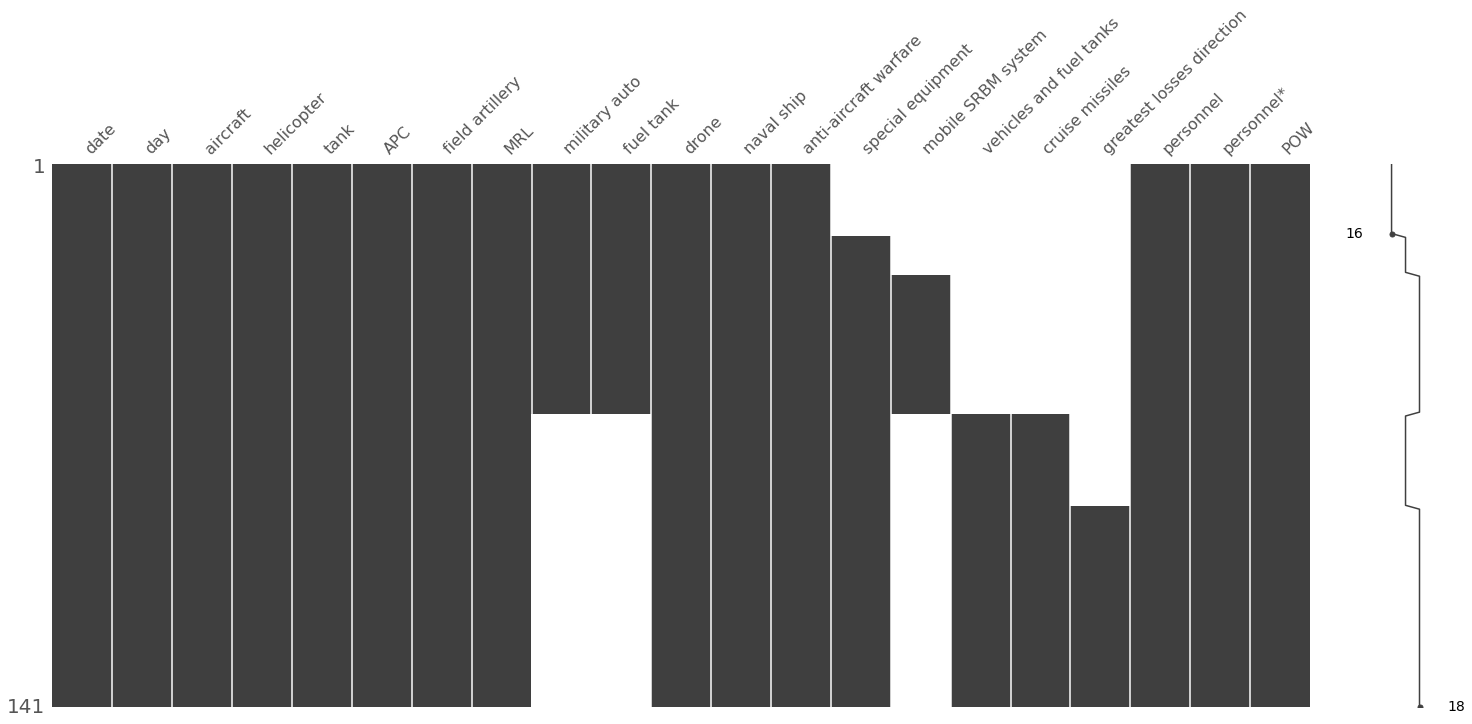

In [16]:
#checking for missing values by showing a diagrammatic representation of the null values in each columns
ms.matrix(russian_losses)

In [17]:
#dropping the null values and replacing with zero 
russian_losses=russian_losses.fillna(0)
russian_losses.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,...,2,0,0.0,0.0,0.0,0.0,0,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,...,2,0,0.0,0.0,0.0,0.0,0,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,...,2,0,0.0,0.0,0.0,0.0,0,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,...,2,5,0.0,0.0,0.0,0.0,0,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,...,2,7,0.0,0.0,0.0,0.0,0,5710,about,200
5,2022-03-02,7,30,31,211,862,85,40,355.0,60.0,...,2,9,0.0,0.0,0.0,0.0,0,5840,about,200
6,2022-03-03,8,30,31,217,900,90,42,374.0,60.0,...,2,11,0.0,0.0,0.0,0.0,0,9000,about,200
7,2022-03-04,9,33,37,251,939,105,50,404.0,60.0,...,2,18,0.0,0.0,0.0,0.0,0,9166,about,200
8,2022-03-05,10,39,40,269,945,105,50,409.0,60.0,...,2,19,0.0,0.0,0.0,0.0,0,10000,about,216
9,2022-03-06,11,44,48,285,985,109,50,447.0,60.0,...,2,21,0.0,0.0,0.0,0.0,0,11000,about,232


In [18]:
# getting a glance of the data types of the columns
russian_losses.dtypes

date                          object
day                           object
aircraft                       int64
helicopter                     int64
tank                           int64
APC                            int64
field artillery                int64
MRL                            int64
military auto                float64
fuel tank                    float64
drone                          int64
naval ship                     int64
anti-aircraft warfare          int64
special equipment            float64
mobile SRBM system           float64
vehicles and fuel tanks      float64
cruise missiles              float64
greatest losses direction     object
personnel                      int64
personnel*                    object
POW                            int64
dtype: object

In [19]:
#changing the column having float data types to integer data types 
for i in russian_losses.columns:
    if russian_losses[i].dtypes == 'float64':
        russian_losses[i]=russian_losses[i].astype('int64')
russian_losses.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,...,2,0,0,0,0,0,0,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,...,2,0,0,0,0,0,0,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,...,2,0,0,0,0,0,0,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,...,2,5,0,0,0,0,0,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,...,2,7,0,0,0,0,0,5710,about,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,...,2,9,0,0,0,0,0,5840,about,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,...,2,11,0,0,0,0,0,9000,about,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,...,2,18,0,0,0,0,0,9166,about,200
8,2022-03-05,10,39,40,269,945,105,50,409,60,...,2,19,0,0,0,0,0,10000,about,216
9,2022-03-06,11,44,48,285,985,109,50,447,60,...,2,21,0,0,0,0,0,11000,about,232


In [20]:
#dropping irrevelant columns
russian_losses=russian_losses.drop(columns=['mobile SRBM system','personnel*'])
russian_losses.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,0,0,0,2800,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,0,0,0,0,4300,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,0,0,0,0,4500,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0,0,0,0,5300,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0,0,0,0,5710,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,0,0,0,0,5840,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,0,0,0,0,9000,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,0,0,0,0,9166,200
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,0,0,0,0,10000,216
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,0,0,0,0,11000,232


In [21]:
#Consolidating repetitive columns and deleting blank ones
#this is due the improvement of the data collection and management process

In [22]:
#showing the trend between the repetitive columns that necessitate the need for consolidating 
russian_losses[['vehicles and fuel tanks','fuel tank']].head(10)

,vehicles and fuel tanks,fuel tank
0,0,60
1,0,60
2,0,60
3,0,60
4,0,60
5,0,60
6,0,60
7,0,60
8,0,60
9,0,60


In [23]:
#Consolidating repetitive columns 
russian_losses['vehicles and fuel tanks']+=russian_losses['fuel tank']
russian_losses.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,60,0,0,2800,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,0,60,0,0,4300,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,0,60,0,0,4500,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0,60,0,0,5300,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0,60,0,0,5710,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,0,60,0,0,5840,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,0,60,0,0,9000,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,0,60,0,0,9166,200
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,0,60,0,0,10000,216
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,0,60,0,0,11000,232


In [24]:
#showing the trend between the repetitive columns that necessitate the need for consolidating
russian_losses[['special equipment','military auto']].head(10)

,special equipment,military auto
0,0,100
1,0,130
2,0,130
3,0,291
4,0,305
5,0,355
6,0,374
7,0,404
8,0,409
9,0,447


In [25]:
#filling null values with appropriate informative string
russian_losses['greatest losses direction']==0
russian_losses['greatest losses direction'][russian_losses['greatest losses direction']==0] = 'Unavailable'
russian_losses.head(10)

C:\Users\Mubaraq\AppData\Local\Temp/ipykernel_1932/2797181385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russian_losses['greatest losses direction'][russian_losses['greatest losses direction']==0] = 'Unavailable'


,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,60,0,Unavailable,2800,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,0,60,0,Unavailable,4300,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,0,60,0,Unavailable,4500,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0,60,0,Unavailable,5300,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0,60,0,Unavailable,5710,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,0,60,0,Unavailable,5840,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,0,60,0,Unavailable,9000,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,0,60,0,Unavailable,9166,200
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,0,60,0,Unavailable,10000,216
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,0,60,0,Unavailable,11000,232


In [26]:
#dropping irrevelant columns
russian_losses=russian_losses.drop(columns=['fuel tank'])
russian_losses.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100,0,2,0,0,60,0,Unavailable,2800,0
1,2022-02-26,3,27,26,146,706,49,4,130,2,2,0,0,60,0,Unavailable,4300,0
2,2022-02-27,4,27,26,150,706,50,4,130,2,2,0,0,60,0,Unavailable,4500,0
3,2022-02-28,5,29,29,150,816,74,21,291,3,2,5,0,60,0,Unavailable,5300,0
4,2022-03-01,6,29,29,198,846,77,24,305,3,2,7,0,60,0,Unavailable,5710,200
5,2022-03-02,7,30,31,211,862,85,40,355,3,2,9,0,60,0,Unavailable,5840,200
6,2022-03-03,8,30,31,217,900,90,42,374,3,2,11,0,60,0,Unavailable,9000,200
7,2022-03-04,9,33,37,251,939,105,50,404,3,2,18,0,60,0,Unavailable,9166,200
8,2022-03-05,10,39,40,269,945,105,50,409,3,2,19,0,60,0,Unavailable,10000,216
9,2022-03-06,11,44,48,285,985,109,50,447,4,2,21,0,60,0,Unavailable,11000,232


### The data is cumulative. That means each new record is accumulated data from successive additions of the previous days.

The goal of the notebook is to represent data on a daily based. This is to make it very simple and useful for analysis.

*Dataset showing the values of each column on a daily basis*

In [27]:
russian_losses_day2=russian_losses[russian_losses['day']=='2']
russian_losses_daily=russian_losses.set_index(['date','day','greatest losses direction']).diff().fillna(0).astype(int).reset_index()
russian_losses_daily=russian_losses_daily[['date','day','aircraft','helicopter','tank','APC','field artillery','MRL','military auto','drone','naval ship','anti-aircraft warfare','special equipment','vehicles and fuel tanks','cruise missiles','greatest losses direction','personnel','POW']]
russian_losses_daily[russian_losses_daily['day']=='2']=russian_losses_day2
russian_losses_daily.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100,0,2,0,0,60,0,Unavailable,2800,0
1,2022-02-26,3,17,19,66,190,0,0,30,2,0,0,0,0,0,Unavailable,1500,0
2,2022-02-27,4,0,0,4,0,1,0,0,0,0,0,0,0,0,Unavailable,200,0
3,2022-02-28,5,2,3,0,110,24,17,161,1,0,5,0,0,0,Unavailable,800,0
4,2022-03-01,6,0,0,48,30,3,3,14,0,0,2,0,0,0,Unavailable,410,200
5,2022-03-02,7,1,2,13,16,8,16,50,0,0,2,0,0,0,Unavailable,130,0
6,2022-03-03,8,0,0,6,38,5,2,19,0,0,2,0,0,0,Unavailable,3160,0
7,2022-03-04,9,3,6,34,39,15,8,30,0,0,7,0,0,0,Unavailable,166,0
8,2022-03-05,10,6,3,18,6,0,0,5,0,0,1,0,0,0,Unavailable,834,16
9,2022-03-06,11,5,8,16,40,4,0,38,1,0,2,0,0,0,Unavailable,1000,16


In [28]:
#replacing negative values in the dataset with appropriate values
russian_losses_daily=russian_losses_daily.replace({'military auto': {-1701: 0}})

In [29]:
#getting a preview of the file
russian_losses_daily.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100,0,2,0,0,60,0,Unavailable,2800,0
1,2022-02-26,3,17,19,66,190,0,0,30,2,0,0,0,0,0,Unavailable,1500,0
2,2022-02-27,4,0,0,4,0,1,0,0,0,0,0,0,0,0,Unavailable,200,0
3,2022-02-28,5,2,3,0,110,24,17,161,1,0,5,0,0,0,Unavailable,800,0
4,2022-03-01,6,0,0,48,30,3,3,14,0,0,2,0,0,0,Unavailable,410,200
5,2022-03-02,7,1,2,13,16,8,16,50,0,0,2,0,0,0,Unavailable,130,0
6,2022-03-03,8,0,0,6,38,5,2,19,0,0,2,0,0,0,Unavailable,3160,0
7,2022-03-04,9,3,6,34,39,15,8,30,0,0,7,0,0,0,Unavailable,166,0
8,2022-03-05,10,6,3,18,6,0,0,5,0,0,1,0,0,0,Unavailable,834,16
9,2022-03-06,11,5,8,16,40,4,0,38,1,0,2,0,0,0,Unavailable,1000,16


In [30]:
#converting the clean datasets to excel format for subsequent extraction
russian_losses.to_excel('russian_losses.xlsx')
russian_losses_daily.to_excel('russian_losses_daily.xlsx')

# 5. Data Exploration & Visualization

*In this section, the aim is to uncover dataset characteristics, learn about the potential problem and visually represent our findings. In this process i made use of Pandas (for Data Manipulation), MatPlotlib (for Data Exploration), Seaborn & Folium (for Data Visualisation).*

### Let's look into a diagnostic analysis of dataset by using correlation analysis to find out any trends from the dataset

In [31]:
#a preview of the correlation matrix
russian_losses_daily.corr()

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,personnel,POW
aircraft,1.000000,0.472626,0.483649,0.440896,0.145875,-0.001351,0.351916,-0.163569,0.137054,0.123938,0.058869,0.006203,-0.019902,0.309817,0.005778
helicopter,0.472626,1.000000,0.356874,0.371008,0.245802,0.119247,0.394521,-0.186191,0.150019,0.346839,0.152785,-0.047403,-0.063077,0.318788,0.074906
tank,0.483649,0.356874,1.000000,0.703314,0.389075,0.122946,0.395960,-0.028048,0.232460,0.128902,0.107354,0.057882,0.035187,0.458032,0.269830
APC,0.440896,0.371008,0.703314,1.000000,0.619112,0.195480,0.500325,-0.041417,0.376744,0.100547,0.058787,0.022876,-0.012278,0.638581,0.009836
field artillery,0.145875,0.245802,0.389075,0.619112,1.000000,0.324090,0.587734,0.084411,0.290797,0.252042,0.290018,0.137705,0.109166,0.332169,-0.080389
MRL,-0.001351,0.119247,0.122946,0.195480,0.324090,1.000000,0.442137,0.086931,0.181573,0.309524,0.061029,-0.053469,-0.065302,0.117479,0.000084
military auto,0.351916,0.394521,0.395960,0.500325,0.587734,0.442137,1.000000,-0.198313,0.138537,0.467223,0.404751,-0.052533,-0.074942,0.312988,0.037439
drone,-0.163569,-0.186191,-0.028048,-0.041417,0.084411,0.086931,-0.198313,1.000000,0.126825,-0.090352,0.184608,0.163766,0.174052,-0.097750,-0.161939
naval ship,0.137054,0.150019,0.232460,0.376744,0.290797,0.181573,0.138537,0.126825,1.000000,0.062644,-0.034399,-0.004981,-0.036209,0.240520,-0.025890
anti-aircraft warfare,0.123938,0.346839,0.128902,0.100547,0.252042,0.309524,0.467223,-0.090352,0.062644,1.000000,0.188327,0.130636,0.132000,0.127831,0.129307


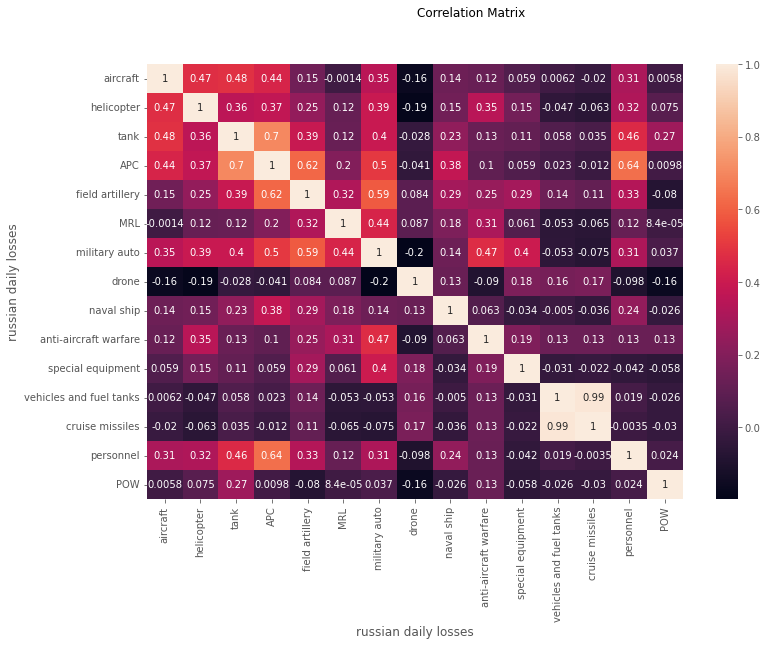

In [32]:
#let's visualize our correlation matrix
#it is nice to visualize because it is tough reading from the correlation matrix
correlation_matrix=russian_losses_daily.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.suptitle('Correlation Matrix')
plt.xlabel('russian daily losses')
plt.ylabel('russian daily losses')
plt.show()

In [33]:
#let's organize them into a list for better comprehension amidst the correlation analysis
correlation_pairs=correlation_matrix.unstack()
correlation_pairs

aircraft                 aircraft                   1.000000
                         helicopter                 0.472626
                         tank                       0.483649
                         APC                        0.440896
                         field artillery            0.145875
                         MRL                       -0.001351
                         military auto              0.351916
                         drone                     -0.163569
                         naval ship                 0.137054
                         anti-aircraft warfare      0.123938
                         special equipment          0.058869
                         vehicles and fuel tanks    0.006203
                         cruise missiles           -0.019902
                         personnel                  0.309817
                         POW                        0.005778
helicopter               aircraft                   0.472626
                        

In [34]:
#now sorting the correlation pairs
sorted_pairs=correlation_pairs.sort_values(ascending=False)
sorted_pairs

aircraft                 aircraft                   1.000000
helicopter               helicopter                 1.000000
personnel                personnel                  1.000000
cruise missiles          cruise missiles            1.000000
vehicles and fuel tanks  vehicles and fuel tanks    1.000000
special equipment        special equipment          1.000000
anti-aircraft warfare    anti-aircraft warfare      1.000000
naval ship               naval ship                 1.000000
military auto            military auto              1.000000
MRL                      MRL                        1.000000
field artillery          field artillery            1.000000
APC                      APC                        1.000000
tank                     tank                       1.000000
drone                    drone                      1.000000
POW                      POW                        1.000000
vehicles and fuel tanks  cruise missiles            0.985505
cruise missiles         

In [35]:
#showing pairs having high correlation i.e. having > 0.5
sorted_pairs[(sorted_pairs>0.5)&(sorted_pairs!=1)].drop_duplicates()

vehicles and fuel tanks  cruise missiles    0.985505
tank                     APC                0.703314
APC                      personnel          0.638581
                         field artillery    0.619112
field artillery          military auto      0.587734
military auto            APC                0.500325
dtype: float64

- From the above we can deduce that APC(Armored Personnel Carrier) and Personnel have a high correlation.
- This is due to the fact that for the APC to be used during the war, it will demand extra soldiers(personnel) on the field to operate the APC and likewise, hence loss of russian personnel during the war leads to loss of equipment as well

In [36]:
#showing the correlation between POW and rest of the data in the column
correlation_pairs['POW']

aircraft                   0.005778
helicopter                 0.074906
tank                       0.269830
APC                        0.009836
field artillery           -0.080389
MRL                        0.000084
military auto              0.037439
drone                     -0.161939
naval ship                -0.025890
anti-aircraft warfare      0.129307
special equipment         -0.057761
vehicles and fuel tanks   -0.025530
cruise missiles           -0.029554
personnel                  0.024082
POW                        1.000000
dtype: float64

- We can see from the above that the POW (Prisoner of War) data has a low correlation/negative correlation with every other data in the column
- Hence we can deduce that, from the extremely low correlation between POW and the rest of the data, the higher the number of ukraine soldiers (POW) held captive, the lesser number of Military Equipment losses and russian soldiers (Personnel) were lost during the war

##### Getting the total daily loss for all equipments

In [37]:
russian_losses_daily['total_daily_equip_loss']=russian_losses_daily['aircraft'] +russian_losses_daily['helicopter']+russian_losses_daily['tank']+russian_losses_daily['APC']+russian_losses_daily['field artillery']+russian_losses_daily['MRL']+russian_losses_daily['military auto']+russian_losses_daily['drone']+russian_losses_daily['naval ship']+russian_losses_daily['anti-aircraft warfare']+russian_losses_daily['special equipment']+russian_losses_daily['vehicles and fuel tanks']+russian_losses_daily['cruise missiles']
russian_losses_daily.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW,total_daily_equip_loss
0,2022-02-25,2,10,7,80,516,49,4,100,0,2,0,0,60,0,Unavailable,2800,0,828
1,2022-02-26,3,17,19,66,190,0,0,30,2,0,0,0,0,0,Unavailable,1500,0,324
2,2022-02-27,4,0,0,4,0,1,0,0,0,0,0,0,0,0,Unavailable,200,0,5
3,2022-02-28,5,2,3,0,110,24,17,161,1,0,5,0,0,0,Unavailable,800,0,323
4,2022-03-01,6,0,0,48,30,3,3,14,0,0,2,0,0,0,Unavailable,410,200,100
5,2022-03-02,7,1,2,13,16,8,16,50,0,0,2,0,0,0,Unavailable,130,0,108
6,2022-03-03,8,0,0,6,38,5,2,19,0,0,2,0,0,0,Unavailable,3160,0,72
7,2022-03-04,9,3,6,34,39,15,8,30,0,0,7,0,0,0,Unavailable,166,0,142
8,2022-03-05,10,6,3,18,6,0,0,5,0,0,1,0,0,0,Unavailable,834,16,39
9,2022-03-06,11,5,8,16,40,4,0,38,1,0,2,0,0,0,Unavailable,1000,16,114


In [38]:
#getting the days with the highest equipment loss
russian_losses_daily[['day','date','total_daily_equip_loss']].sort_values(by=['total_daily_equip_loss'],ascending=False).head().set_index('day')

,date,total_daily_equip_loss
day,,
67,2022-05-01,1881
2,2022-02-25,828
21,2022-03-16,382
3,2022-02-26,324
5,2022-02-28,323


- From the above we can see the days having the highest military equipment losses in the Russian Ukraine war, with `Day 67` (1st May) having the highest equipment losses with a total number of `1881`.






In [39]:
#getting the days with the lowest equipment loss
russian_losses_daily[['day','date','total_daily_equip_loss']].sort_values(by=['total_daily_equip_loss'],ascending=False).tail().set_index('day')

,date,total_daily_equip_loss
day,,
45,2022-04-09,15
140,2022-07-13,12
139,2022-07-12,8
44,2022-04-08,7
4,2022-02-27,5


- From the above we can see the days having the lowest military equipment losses in the russian ukraine war, with `Day 4` (27th February) having the lowest equipment losses with a total number of `5`.

##### What is the most recent count of equipment loss?

In [40]:
russian_losses_daily[['total_daily_equip_loss']].sum()

total_daily_equip_loss    12494
dtype: int64

- The most recent count of equipment loss is `12494` - which was as at June 25th, Day 142 of the war

In [41]:
#showing the dataset for available cities with the greatest losses direction
geodata_ukraine=russian_losses_daily[russian_losses_daily['greatest losses direction']!='Unavailable']
geodata_ukraine.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,greatest losses direction,personnel,POW,total_daily_equip_loss
89,2022-05-25,91,1,0,3,19,0,0,0,11,0,0,1,4,0,Lyman,100,0,39
90,2022-05-26,92,0,0,10,22,11,0,0,11,0,0,3,8,2,Avdiivka,150,0,67
91,2022-05-27,93,0,0,7,11,6,0,0,1,0,0,1,1,1,Avdiivka,150,0,28
92,2022-05-28,94,1,4,8,12,5,2,0,0,0,0,0,0,1,Avdiivka and Kryvyi Rih,250,0,33
93,2022-05-29,95,0,0,8,12,3,0,0,1,0,0,0,14,0,Bahmut,150,0,38
94,2022-05-30,96,0,0,11,12,12,2,0,3,0,0,0,18,2,Zaporizhzhia,200,0,60
95,2022-05-31,97,1,0,9,20,6,2,0,8,0,0,0,17,2,Kryvyi Rih and Zaporizhzhya,150,0,65
96,2022-06-01,98,0,1,3,41,10,0,0,4,0,1,1,15,0,Kryvyi Rih and Bakhmut,200,0,76
97,2022-06-02,99,2,0,2,11,2,0,0,2,0,1,2,35,0,Bakhmut,150,0,57
98,2022-06-03,100,0,0,4,12,14,0,0,14,0,0,0,4,1,Bakhmut,100,0,49


In [42]:
geodata_ukraine['greatest losses direction'].value_counts().head(1)

Bahmut    12
Name: greatest losses direction, dtype: int64

- from the above we can deduce that the city of `Bahmut` in the country Ukraine had the greatest losses of the russian military equipments, hence making it arduous for the russian army to attack during the war which lead to major loss of equipment.

##### Show the total Prisoners of War per day recorded in the Personnel table.

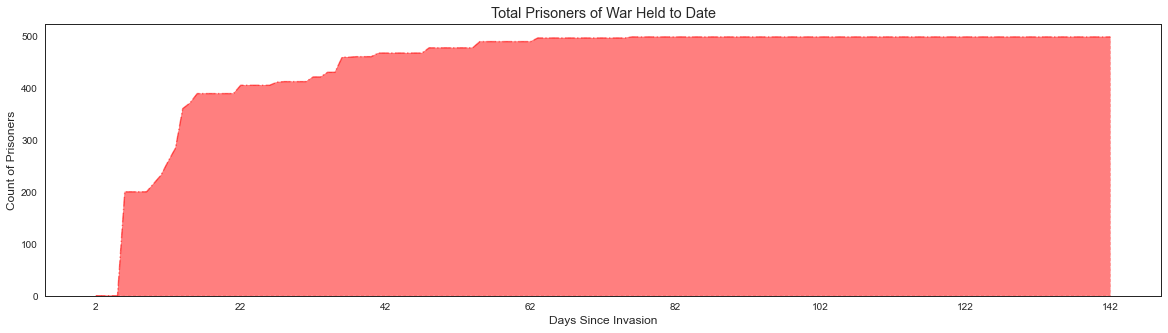

In [43]:
# Set graph style
sns.set_style('white')

# Refine data
pow_data = russian_losses[["day", "POW"]]
#pow_data.reset_index('date', inplace=True
# Create and label plot
pow_data.plot(kind='area', x='day', y='POW', color='red', alpha=.5, figsize=(20,5), legend=False, linestyle="-.")
plt.title('Total Prisoners of War Held to Date')
plt.xlabel('Days Since Invasion')
plt.ylabel("Count of Prisoners")
plt.show()

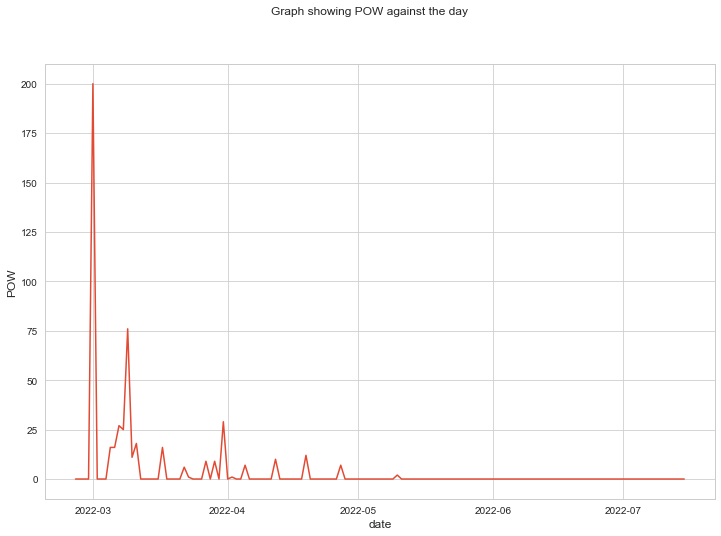

In [44]:
# Plotting the Prisoners of war data against the day to see any trend that can lead to potential information 

# Set Graph Style
sns.set_style(style='whitegrid')

# Create Graph
sns.lineplot(x='date',y='POW',data=russian_losses_daily)
plt.suptitle('Graph showing POW against the day')
plt.show()

- From the graph above we can deduce that over time the number of ukraine soldiers (Prisoners of war) being captured by the russian army since the beginning of the war has decreased over time
- Hence we can infer that the Ukraine army became more difficult to capture due to more awareness by the ukraine armed forces thus developing better ways to strategize

### -Visually representing the country being invaded `Ukraine` and also the city that had the greatest losses of the russian military equipment `Bakhmut`  

In [45]:
## Coordinates as at 27/07/2022 obtained from googlemaps
ukraine_latitude = 48.3794 
ukraine_longitude = 31.1656
ukraine_map = F.Map(location=[ukraine_latitude, ukraine_longitude], tiles="Stamen Terrain", zoom_start=6.49)

bakhmut = F.map.FeatureGroup()

bakhmut_latitude =48.59441
bakhmut_longitude =37.99983
bakhmut.add_child(F.features.CircleMarker([bakhmut_latitude, bakhmut_longitude], radius=5, color="red", fill_color="blue"))
ukraine_map.add_child(bakhmut)

F.Marker([bakhmut_latitude, bakhmut_longitude], popup="Highest loss direction").add_to(ukraine_map)

ukraine_map

- From the map above, we can deduce that the city of bakhmut located in ukraine is around the russia-ukraine border, hence the invasion of the russian army would make first contact with the ukraine soldiers in bakhmut which could infer to be the ukraine strongest line of defence thus leading to the loss of russian military equipment due to the hurdle of penetrating the country of ukraine

# 6. Summary 

In [46]:
#showing the info of the dataset
russian_losses_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date                       141 non-null    object
 1   day                        141 non-null    object
 2   aircraft                   141 non-null    int64 
 3   helicopter                 141 non-null    int64 
 4   tank                       141 non-null    int64 
 5   APC                        141 non-null    int64 
 6   field artillery            141 non-null    int64 
 7   MRL                        141 non-null    int64 
 8   military auto              141 non-null    int64 
 9   drone                      141 non-null    int64 
 10  naval ship                 141 non-null    int64 
 11  anti-aircraft warfare      141 non-null    int64 
 12  special equipment          141 non-null    int64 
 13  vehicles and fuel tanks    141 non-null    int64 
 14  cruise mis

In [47]:
#previewing a statistical representation of the dataset
russian_losses_daily.describe()

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles,personnel,POW,total_daily_equip_loss
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,1.560284,1.333333,11.858156,27.418440,5.971631,1.751773,12.06383,4.829787,0.106383,0.773050,0.475177,19.368794,1.099291,269.503546,3.531915,88.609929
std,2.603209,2.941493,10.905164,46.787079,6.493891,2.823767,24.93426,4.773375,0.372293,1.348909,1.186722,144.579311,7.147732,391.464077,18.510828,172.774741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,0.000000,5.000000,12.000000,2.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000,42.000000
50%,1.000000,0.000000,9.000000,20.000000,5.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,4.000000,0.000000,200.000000,0.000000,63.000000
75%,2.000000,1.000000,15.000000,30.000000,8.000000,2.000000,16.00000,7.000000,0.000000,1.000000,1.000000,12.000000,0.000000,300.000000,0.000000,88.000000
max,17.000000,20.000000,80.000000,516.000000,49.000000,17.000000,179.00000,26.000000,2.000000,8.000000,10.000000,1720.000000,84.000000,3160.000000,200.000000,1881.000000


# 7. Conclusion

### Tracking
- Military Auto - has not been tracked since 2022-05-01; joined with Fuel Tank into Vehicles and Fuel Tanks
- Fuel Tank - has not been tracked since 2022-05-01; joined with Military Auto into Vehicles and Fuel Tanks
- Mobile SRBM System - has not been tracked since 2022-05-01; joined into Cruise Missiles
- Vehicles and Fuel Tanks - appear since 2022-05-01 as a sum of Fuel Tank and Military Auto
- Cruise Missiles - appear since 2022-05-01
- Direction of Greatest Losses - appear since 2022-04-25
- Naval Ship - Warships, Boats

# 8. Closing Remarks and Links

# THANK YOU FOR TAKING TIME TO STUDY MY NOTEBOOK. I HOPE YOU GOT SOME INSIGHTS.
## You can use the links below to view my other pages


- [Data Articles](https://zepanalytics.com/blogs/self-paced-career-path-in-data-analytics)
- [Tableau Dashboards](https://public.tableau.com/app/profile/mubaraq.onipede)
- [LinkedIn Page](https://www.linkedin.com/in/mubaraq-onipede-05562b189/)
- [GitHub Page](https://github.com/Mubarraqqq)